In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# Load the dataset
file_path = 'MS9004_Assignment_2425s2.xlsx'
df = pd.read_excel(file_path)


In [5]:
# Convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)

In [7]:
# Display first few rows
display(df.head())

,risk,length,age,cultures,xray,bed,patient,nurse,facilities,affiliation_yes,region_NE,region_S,region_W
0,4.1,7.13,55.7,9.0,39.6,279,207,241,60.0,False,False,False,True
1,1.6,8.82,58.2,3.8,51.7,80,51,52,40.0,False,False,False,False
2,2.7,8.34,56.9,8.1,74.0,107,82,54,20.0,False,False,True,False
3,5.6,8.95,53.7,18.9,122.8,147,53,148,40.0,False,False,False,True
4,5.7,11.20,56.5,34.5,88.9,180,134,151,40.0,False,True,False,False


In [9]:

# Exploratory Data Analysis (EDA)
print("Basic Info:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   risk             113 non-null    float64
 1   length           113 non-null    float64
 2   age              113 non-null    float64
 3   cultures         113 non-null    float64
 4   xray             113 non-null    float64
 5   bed              113 non-null    int64  
 6   patient          113 non-null    int64  
 7   nurse            113 non-null    int64  
 8   facilities       113 non-null    float64
 9   affiliation_yes  113 non-null    bool   
 10  region_NE        113 non-null    bool   
 11  region_S         113 non-null    bool   
 12  region_W         113 non-null    bool   
dtypes: bool(4), float64(6), int64(3)
memory usage: 8.5 KB
None

Summary Statistics:


,risk,length,age,cultures,xray,bed,patient,nurse,facilities
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,4.354867,9.648319,53.231858,15.792920,81.628319,252.168142,191.371681,173.247788,43.159292
std,1.340908,1.911456,4.461607,10.234707,19.363826,192.842687,153.759564,139.265390,15.200861
min,1.300000,6.700000,38.800000,1.600000,39.600000,29.000000,20.000000,14.000000,5.700000
25%,3.700000,8.340000,50.900000,8.400000,69.500000,106.000000,68.000000,66.000000,31.400000
50%,4.400000,9.420000,53.200000,14.100000,82.300000,186.000000,143.000000,132.000000,42.900000
75%,5.200000,10.470000,56.200000,20.300000,94.100000,312.000000,252.000000,218.000000,54.300000
max,7.800000,19.560000,65.900000,60.500000,133.500000,835.000000,791.000000,656.000000,80.000000


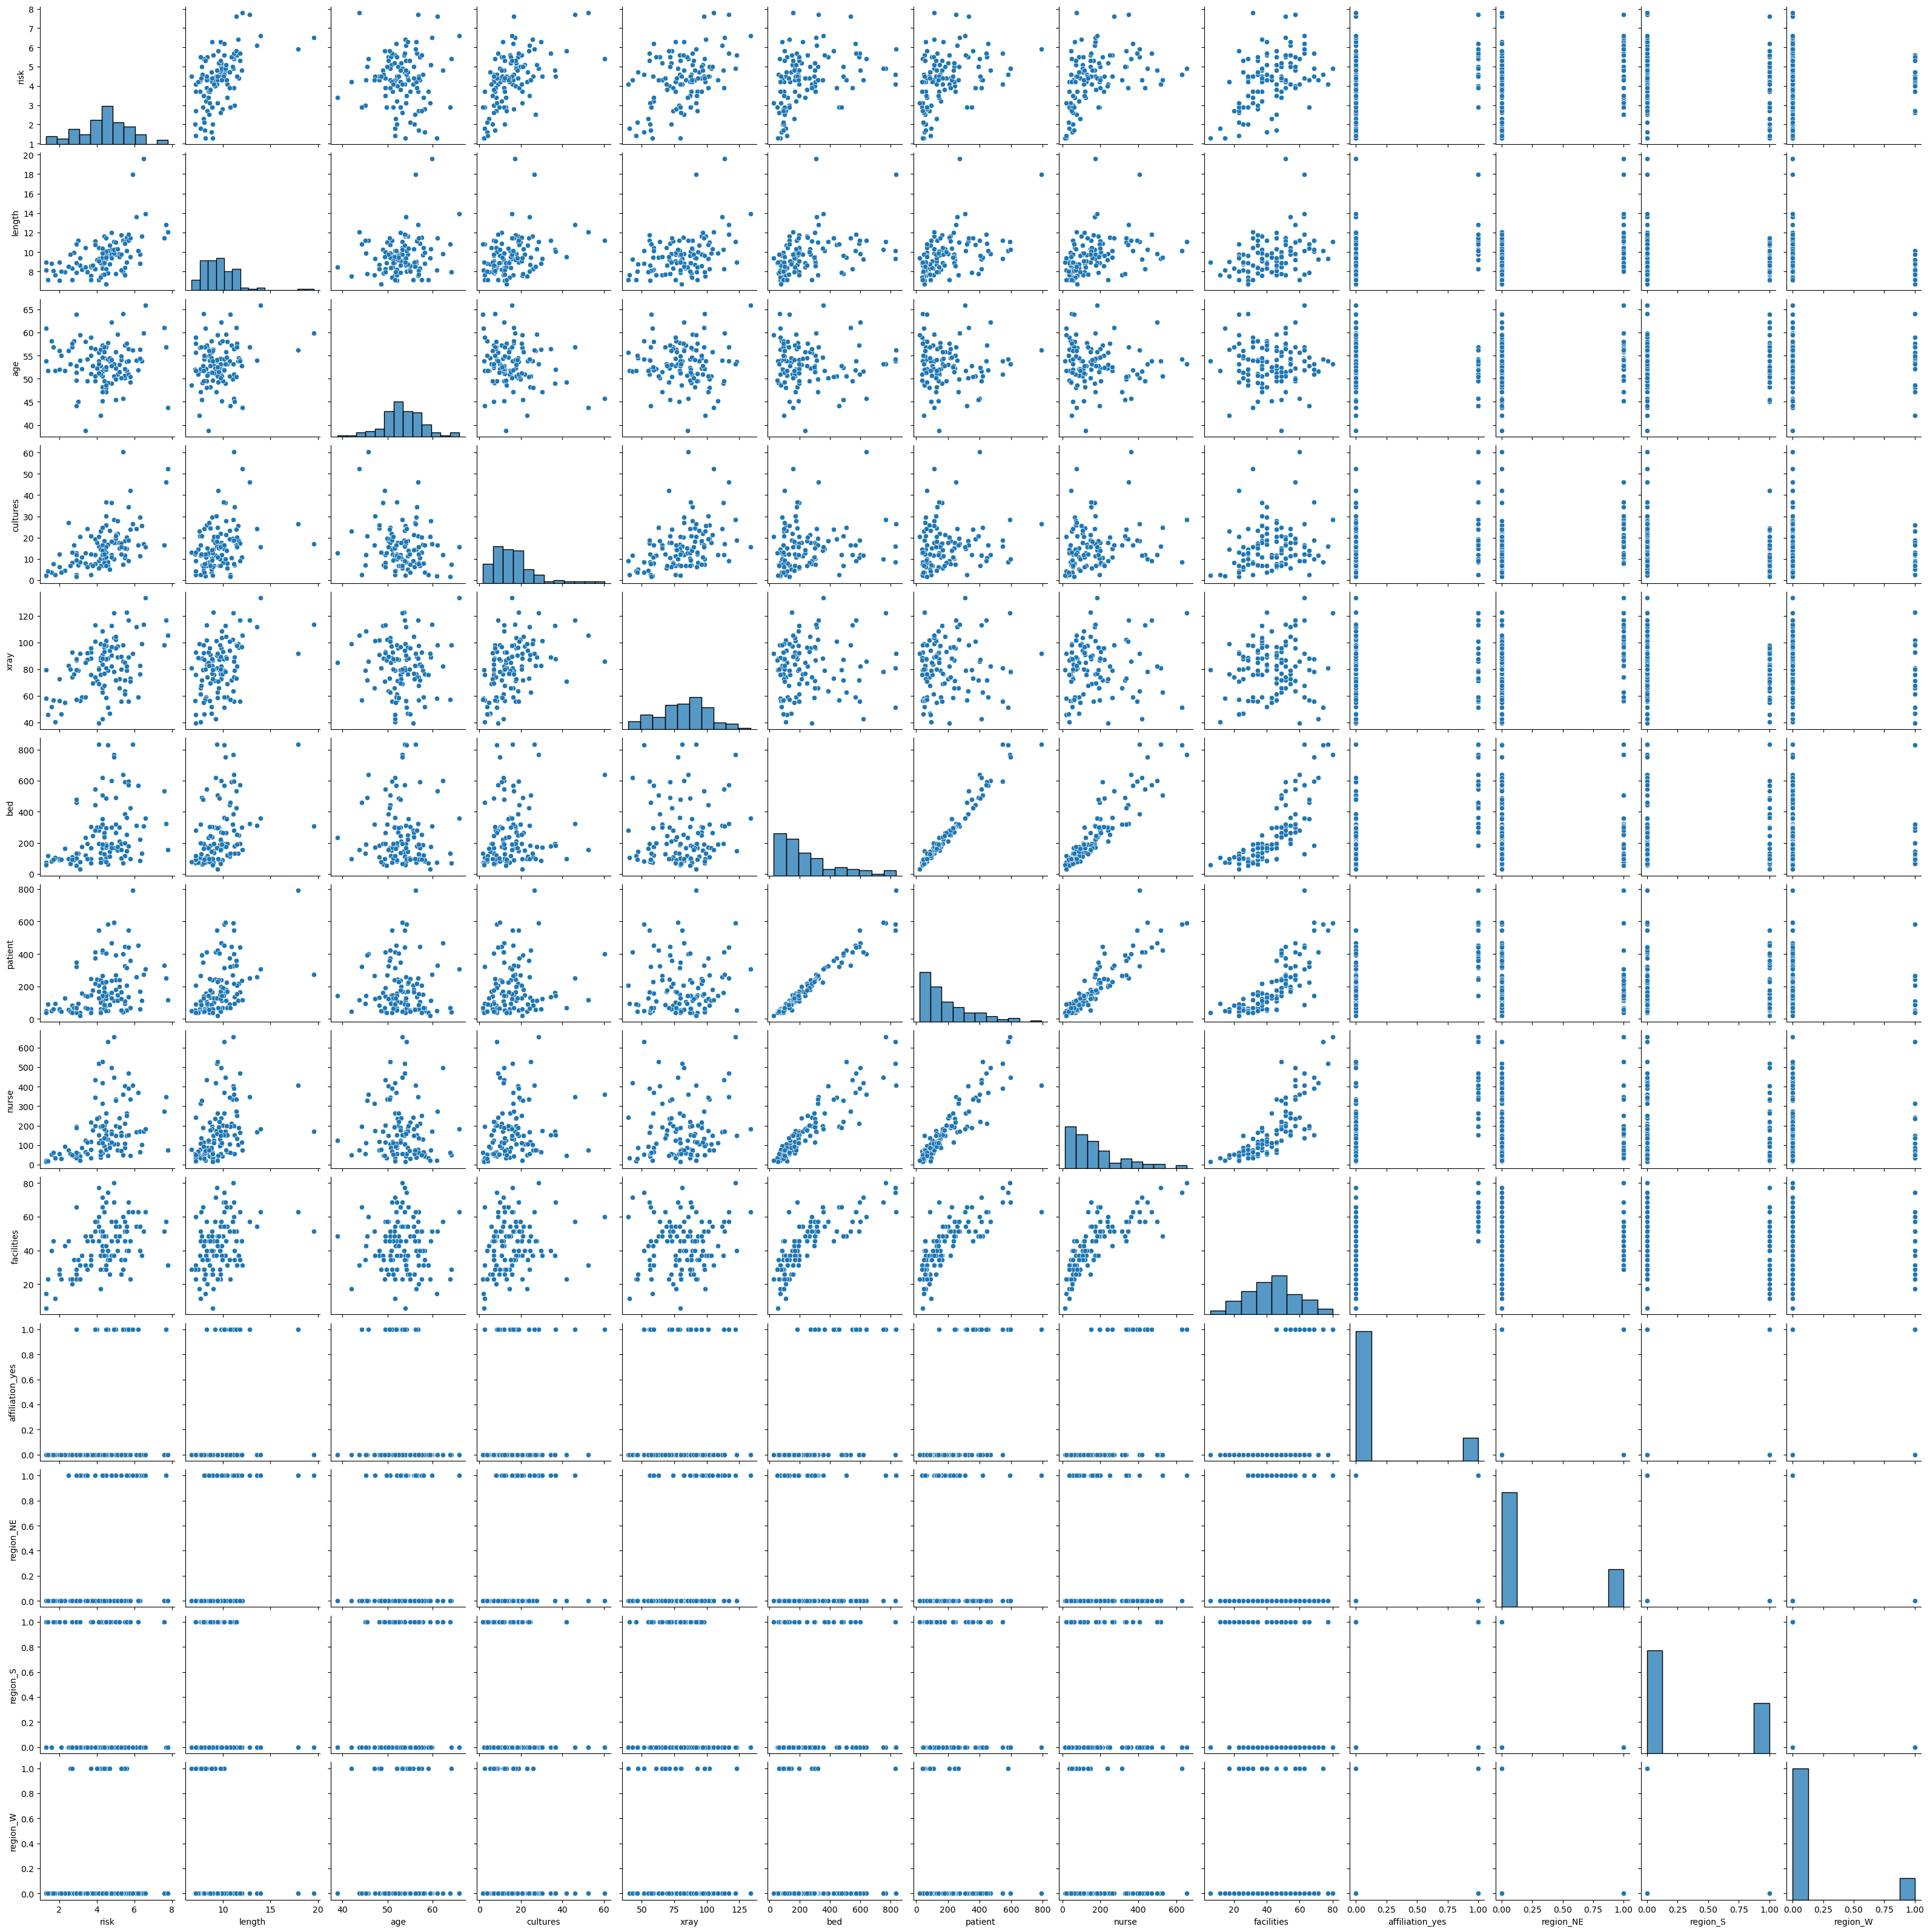

In [11]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

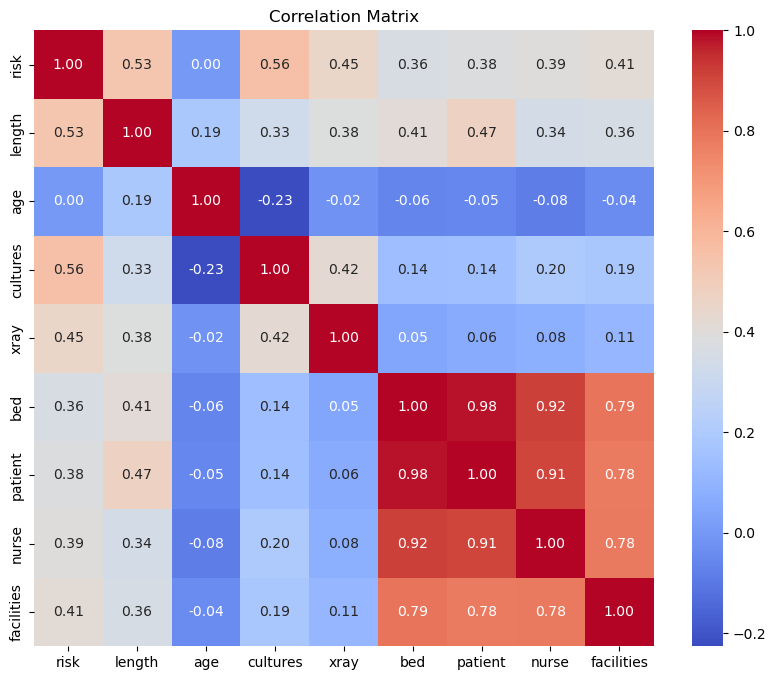

In [15]:
# Correlation Heatmap - Only numeric columns
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [17]:
# Splitting data (75% Train, 25% Test)
X = df.drop(columns=['risk'])  # Features
y = df['risk']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5291)

In [19]:
# Standardizing Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Fit Multiple Linear Regression Model
X_train_const = sm.add_constant(X_train_scaled)  # Adding constant for intercept
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     10.85
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           7.55e-12
Time:                        20:22:06   Log-Likelihood:                -99.652
No. Observations:                  84   AIC:                             225.3
Df Residuals:                      71   BIC:                             256.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3583      0.094     46.341      0.0

In [23]:
# Model Evaluation
X_test_const = sm.add_constant(X_test_scaled)
y_pred = model.predict(X_test_const)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 1.23
R-squared: 0.31


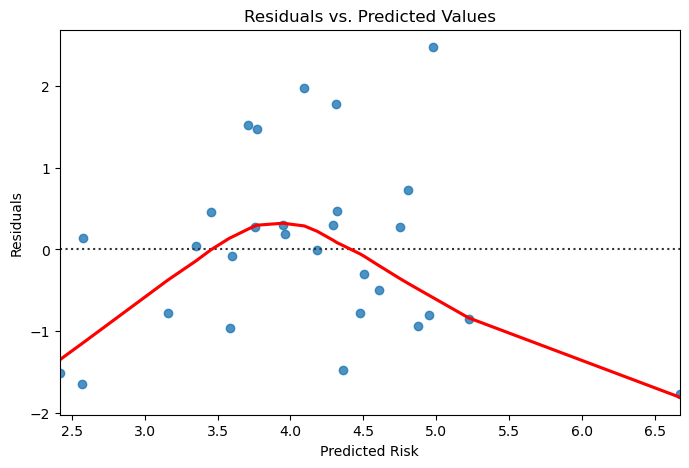

In [25]:
# Residuals Analysis
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=(y_test - y_pred), lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Risk")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


In [27]:

# Model Improvement - Mean Centering
X_train_centered = X_train - X_train.mean()
X_test_centered = X_test - X_train.mean()
print(X_test_centered)

       length       age   cultures       xray     bed     patient       nurse  \
52   1.585238  7.986905   0.254762  15.935714  287.25  140.690476  105.035714   
34  -0.084762  1.286905  -4.945238  -5.864286  -26.75  -19.309524    4.035714   
31   0.015238 -0.113095   1.354762  -9.364286  -37.75   10.690476   71.035714   
92  -0.904762  0.786905 -14.145238  -2.464286 -191.75 -149.309524 -153.964286   
19  -0.474762  0.686905  -0.445238  -1.064286  585.25  357.690476  351.035714   
110 -2.124762  3.786905  -4.145238 -14.064286 -118.75 -104.309524  -31.964286   
10   1.245238  0.086905  12.154762  40.035714  520.25  401.690476  488.035714   
75  -3.124762 -4.513095  -3.345238  -1.164286 -171.75 -138.309524  -88.964286   
25  -1.544762 -3.613095  -4.345238  31.135714  298.25  223.690476  268.035714   
2   -1.484762  3.786905  -8.245238  -7.964286 -140.75 -107.309524 -113.964286   
90  -0.964762 -1.813095  -6.845238   5.535714 -147.75 -124.309524 -114.964286   
47   1.075238  4.086905  -5.

In [29]:
# Fit Multiple Linear Regression Model
#X_train_const = sm.add_constant(X_train_scaled)  # Adding constant for intercept
model = sm.OLS(y_train, X_train_centered ).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   risk   R-squared (uncentered):                   0.055
Model:                            OLS   Adj. R-squared (uncentered):             -0.102
Method:                 Least Squares   F-statistic:                             0.3520
Date:                Tue, 04 Feb 2025   Prob (F-statistic):                       0.975
Time:                        20:22:37   Log-Likelihood:                         -244.21
No. Observations:                  84   AIC:                                      512.4
Df Residuals:                      72   BIC:                                      541.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [31]:
pca = PCA(n_components=5)  # Reducing dimensions
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_test_pca)

[[ 1.79200196e+00 -5.01728178e-01 -1.66815228e+00  2.89765635e-01
   1.86134316e+00]
 [ 9.17726256e-03 -2.13155858e-01 -1.90978544e-01  4.68022499e-01
  -2.52061707e-01]
 [ 3.71528364e-01 -1.83907010e-01  8.90637318e-02  8.51172181e-02
  -3.63364796e-01]
 [-2.96712752e+00  1.04371857e-01 -1.90793118e-01  2.93011411e-01
  -1.66352525e-01]
 [ 4.41525071e+00 -2.29944159e+00 -8.76283466e-01 -2.18444637e-01
   3.32087566e-01]
 [-9.11491434e-01 -8.07810524e-01  1.47372565e+00  2.26695297e+00
   2.14014315e-01]
 [ 6.87392211e+00  7.51112204e-01  6.23592781e-01  8.85477664e-02
   3.53773549e-03]
 [-2.40003266e+00 -4.86295297e-01  2.55246798e+00  7.84233026e-01
  -1.02135608e-01]
 [ 3.50536662e+00 -9.49531615e-01  1.35973618e+00 -3.27518887e-01
   2.77698194e-01]
 [-2.33260405e+00 -9.15136096e-01 -1.19943198e+00 -1.88362561e-01
   7.02286458e-01]
 [-2.07581834e+00 -5.71993356e-01 -6.00117756e-01 -1.00877724e+00
   5.88036513e-01]
 [ 1.96757503e+00 -7.29452171e-01 -7.34494491e-01  9.75063535e-01

In [33]:
# Fit Multiple Linear Regression Model
#X_train_const = sm.add_constant(X_train_scaled)  # Adding constant for intercept
model = sm.OLS(y_train, X_train_centered ).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   risk   R-squared (uncentered):                   0.055
Model:                            OLS   Adj. R-squared (uncentered):             -0.102
Method:                 Least Squares   F-statistic:                             0.3520
Date:                Tue, 04 Feb 2025   Prob (F-statistic):                       0.975
Time:                        20:22:53   Log-Likelihood:                         -244.21
No. Observations:                  84   AIC:                                      512.4
Df Residuals:                      72   BIC:                                      541.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------